In [3]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

# Step 1. 构建人造数据集

In [4]:
# 生成数据集
# param w: 权重
# param b: 偏差
# param num_example: 样本数量
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))  # 生成均值为0, 方差为1的随机数, 生成num_exapmle个样本, 列数为w的长度
    y = torch.matmul(X, w) + b   # y = X w + b
    y += torch.normal(0, 0.01, y.shape) # 为增加难度, 附加一个随机噪音
    return X, y.reshape((-1, 1))  # 返回X 和 y的转置为列向量

true_w = torch.tensor([2, -3.4]) # 真实的w
true_b = 4.2   # 真实的b
features, labels = synthetic_data(true_w, true_b, 1000)  # 调用上面函数, 生成特征和标注

In [5]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.6186,  0.3280]) 
label: tensor([1.8491])


In [9]:
print(features)

tensor([[-0.6186,  0.3280],
        [ 0.7952, -0.6470],
        [-0.0492,  0.0209],
        ...,
        [ 1.5157,  1.2076],
        [ 0.1335,  1.2349],
        [-0.5236, -0.7384]])


In [11]:
print(labels)

tensor([[ 1.8491e+00],
        [ 7.9997e+00],
        [ 4.0299e+00],
        [ 5.3436e+00],
        [ 2.7578e+00],
        [ 4.0960e+00],
        [ 5.8074e-01],
        [ 5.9783e+00],
        [ 6.9963e+00],
        [-2.1998e+00],
        [ 8.8373e+00],
        [ 5.8068e+00],
        [ 2.0789e+00],
        [ 2.0295e+00],
        [ 8.6896e+00],
        [ 9.1595e-01],
        [ 1.0397e+00],
        [ 2.4105e+00],
        [ 1.1362e+01],
        [ 5.7686e+00],
        [ 6.6817e-01],
        [-2.6801e+00],
        [ 6.7440e-01],
        [ 2.0643e+00],
        [ 2.2195e+00],
        [ 1.1084e+01],
        [ 2.5052e+00],
        [ 7.2054e+00],
        [-1.8039e+00],
        [ 3.4244e+00],
        [ 8.4591e+00],
        [ 6.5807e-02],
        [ 6.5947e+00],
        [ 7.2246e+00],
        [ 3.1047e-01],
        [ 2.1397e+00],
        [ 9.5049e+00],
        [ 6.2591e+00],
        [ 4.8648e+00],
        [ 2.1688e+00],
        [ 8.2993e-01],
        [-7.9199e-01],
        [ 2.8473e+00],
        [ 2

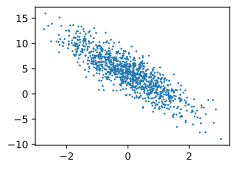

In [7]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);

# Step 2: 读取数据集

In [12]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [13]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.4648,  0.7908],
        [-0.1935, -0.2217],
        [ 0.3152,  0.9911],
        [ 0.8501, -1.9105],
        [-0.8712,  0.6632],
        [ 0.6360, -0.0873],
        [ 0.2164, -0.0085],
        [-0.7469, -0.8588],
        [-0.4293, -2.2072],
        [-1.2420,  0.1434]]) 
 tensor([[ 2.4379],
        [ 4.5708],
        [ 1.4531],
        [12.3786],
        [ 0.2063],
        [ 5.7697],
        [ 4.6552],
        [ 5.6223],
        [10.8520],
        [ 1.2407]])
